In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('twitter_training.csv')
data.shape

(74682, 3)

In [4]:
data.sample(10)

,PLATFORM,ANALYSIS,REVIEW
59902,Facebook,Neutral,"2 Aww, I never knew Twitter launches balloons ..."
74145,Nvidia,Positive,Super nice! I get one! Jetson Nano 2GB
4370,CallOfDutyBlackopsColdWar,Positive,Randomly went for this at the end of the game....
66317,johnson&johnson,Negative,Johnson & Johnson has become my fourth
6587,Amazon,Irrelevant,NaN
20668,WorldOfCraft,Irrelevant,An apt English quote about my art if honest I'...
21277,CS-GO,Positive,CSGO. MM crazy rounds! twitch.tv / hitmanstylez
57642,TomClancysRainbowSix,Negative,@Rainbow6Game fix your ranked elo system. Won ...
50295,FIFA,Positive,Happy birthday RhandlerR sir. From 2006 to 201...
51262,FIFA,Positive,Goosebumps! Was she only 6 at the early time! ...


In [5]:
data.isnull().sum()

PLATFORM      0
ANALYSIS      0
REVIEW      686
dtype: int64

In [6]:
data.dropna(inplace=True)

In [7]:
data.isnull().sum()

PLATFORM    0
ANALYSIS    0
REVIEW      0
dtype: int64

In [8]:
data.sample()

,PLATFORM,ANALYSIS,REVIEW
46716,HomeDepot,Positive,"@GovWhitmer, your extreme social distancing or..."


In [9]:
data.drop(columns=['PLATFORM','ANALYSIS'], inplace=True)

In [10]:
data.sample()

,REVIEW
55789,So wait. I can't play @ CallofDuty on my accou...


In [11]:
from textblob import TextBlob

In [12]:
data.head()

,REVIEW
0,im getting on borderlands and i will murder yo...
1,I am coming to the borders and I will kill you...
2,im getting on borderlands and i will kill you ...
3,im coming on borderlands and i will murder you...
4,im getting on borderlands 2 and i will murder ...


In [13]:
data.shape

(73996, 1)

In [14]:
TextBlob("I am coming to the borders").sentiment.polarity

0.0

In [15]:
polarity =[]
for i in data['REVIEW']:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)
    except:
        polarity.append(0)
len(polarity)

73996

In [16]:
data['Polarity'] = polarity

In [17]:
data.sample()

,REVIEW,Polarity
66999,Johnson & Son to stop selling talc-based Johns...,0.0


In [18]:
data['Polarity'] = data['Polarity'].round()

In [19]:
print("Positive Comment : ",(data['Polarity']==1).sum())
print("Nutral Comment : ",(data['Polarity']==0).sum())
print("Nagetive Comment",(data['Polarity']==-1).sum())

Positive Comment :  7381
Nutral Comment :  63244
Nagetive Comment 3371


In [20]:
positive = data['Polarity']== 1
Nautral = data['Polarity']== 0
Nagative = data['Polarity']== -1

In [21]:
positive_comment = data[positive]
positive_comment.sample(10)

,REVIEW,Polarity
23184,Thank you @TeamEndpoint . . . Delightful indee...,1.0
59309,would love y’all! ALL FOR YA’LL!!!. Tune me my...,1.0
31999,Watching my brother play league and I liked th...,1.0
50740,Evening everyone! I have a friend who is a gre...,1.0
68729,is BREATHTAKING!,1.0
24817,Why is Google Adsense not an effective long-te...,1.0
37611,I'm Hyped! I'm loving the . Aranna Starseeker ...,1.0
46664,"With the return of Viktor Khomeiko, they will ...",1.0
69570,:D,1.0
6303,Everything about this film sounds SO GOOD..,1.0


In [22]:
from wordcloud import WordCloud, STOPWORDS

In [23]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [24]:
data['REVIEW']

0        im getting on borderlands and i will murder yo...
1        I am coming to the borders and I will kill you...
2        im getting on borderlands and i will kill you ...
3        im coming on borderlands and i will murder you...
4        im getting on borderlands 2 and i will murder ...
                               ...                        
74677    Just realized that the Windows partition of my...
74678    Just realized that my Mac window partition is ...
74679    Just realized the windows partition of my Mac ...
74680    Just realized between the windows partition of...
74681    Just like the windows partition of my Mac is l...
Name: REVIEW, Length: 73996, dtype: object

In [25]:
type(data['REVIEW'])

pandas.core.series.Series

In [26]:
all_positive_reviews = " ".join(positive_comment['REVIEW'])
type(all_positive_reviews)

str

In [27]:
import tkinter as tk
from tkinter import simpledialog
from PIL import Image

Create a WordCloud for 5000 Words


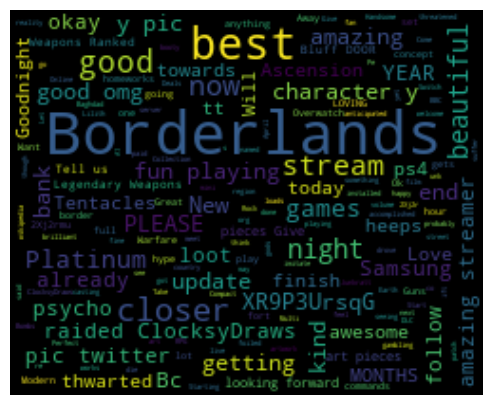

In [99]:
all_positive_reviews = " ".join(positive_comment['REVIEW'])

def user_input():
    root = tk.Tk()
    root.withdraw()  
    input_value = simpledialog.askstring("Input", "Please Enter Your Number")
    return input_value
obj = user_input()
obj = int(obj)
print(f"Create a WordCloud for {obj} Words")

mask = np.array(Image.open('round.jpg'))
mask[mask == 255] = 0

all_positive_reviews = " ".join(positive_comment['REVIEW'])
wordcloud = WordCloud(mask=mask, stopwords=STOPWORDS, background_color='black',contour_color='red', contour_width=1).generate(all_positive_reviews[0:obj])
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

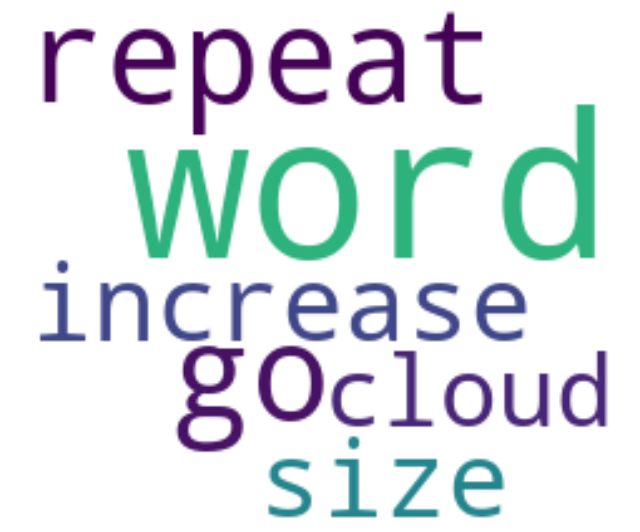

In [101]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load heart shape image
heart_mask = np.array(Image.open('heart.png'))  # Replace with your heart shape image path

# Define your text
text = "Your words go here. You can repeat words to increase their size in the word cloud."

# Create the word cloud
wordcloud = WordCloud(mask=heart_mask, background_color='white', contour_color='red', contour_width=1).generate(text)

# Display the word cloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.show()

# Save the word cloud image
wordcloud.to_file('heart_wordcloud.png')

In [103]:
pip install wordcloud matplotlib numpy pillow

Note: you may need to restart the kernel to use updated packages.


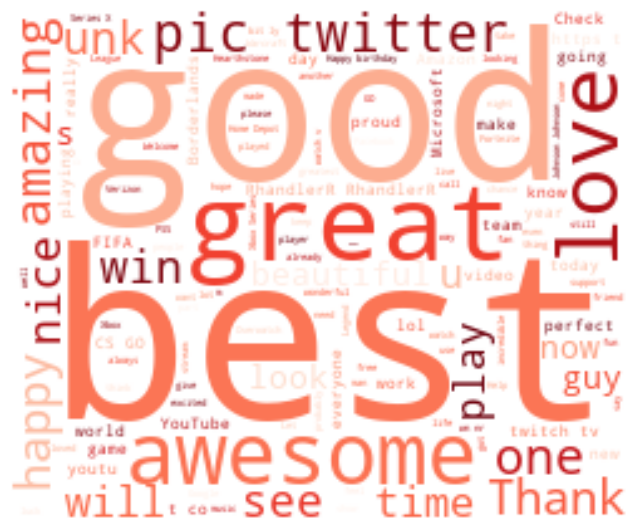

In [109]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load heart shape image
heart_mask = np.array(Image.open('heart.png'))

# Define your text
all_positive_reviews = " ".join(positive_comment['REVIEW'])
# Create the word cloud
wordcloud = WordCloud(mask=heart_mask, 
                      background_color='white', 
                      contour_color='red', 
                      contour_width=1,
                      colormap='Reds').generate(all_positive_reviews)

# Display the word cloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.show()

# Save the word cloud image
wordcloud.to_file('heart_wordcloud.png')

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


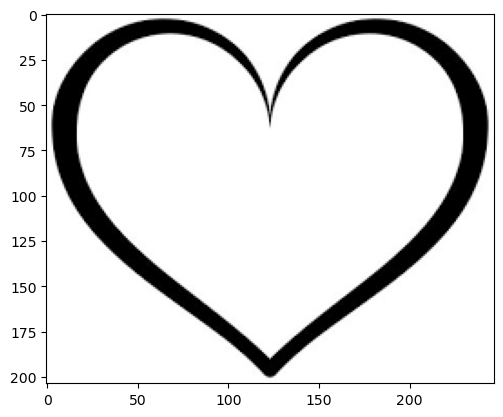

In [126]:
heart_mask = Image.open('heart.png')
imgInArray = np.array(heart_mask)
print(imgInArray)
plt.imshow(heart_mask)